# PyTorch Deep Learning - Tensors and Models
* Notebook by Adam Lang
* Date: 1/13/2024

# Overview
* We will go over PyTorch best practices from Tensors to building neural networks.

## Imports

In [1]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.2.1 --progress-bar off

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 2.2.1 which is incompatible.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.1 which is incompatible.


In [2]:
## check torch version
import torch

print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.2.1+cu121


In [3]:
## check gpu
!nvidia-smi

Mon Jan 20 00:15:54 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
## check for cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Tensors Best Practices

## Scalar

In [5]:
## scalars
scalar = torch.tensor(100)
scalar

tensor(100)

In [6]:
## internal value of tensor
scalar.item()

100

In [7]:
## checking dtypes
scalar.dtype

torch.int64

In [8]:
## create float scalar
float_scalar = scalar.to(torch.float32)
float_scalar, float_scalar.dtype

(tensor(100.), torch.float32)

In [9]:
## casting to float64
float_scalar = scalar.to(torch.float64)
float_scalar, float_scalar.dtype

(tensor(100., dtype=torch.float64), torch.float64)

In [10]:
## item
float_scalar.item()

100.0

## Vector

In [11]:
## creating Vector
vector = torch.tensor([1, 50])
vector

tensor([ 1, 50])

In [12]:
## shape
vector.shape

torch.Size([2])

In [13]:
## dtype
vector.dtype

torch.int64

In [14]:
## create another tensor
vector = torch.tensor([[1, 42.]])
vector

tensor([[ 1., 42.]])

Summary
* You cant create a tensor of different dtypes so torch casted all numbers to floats.

## Matrix

In [15]:
## matrix
matrix = torch.tensor([[1,100], [1,100]])
matrix

tensor([[  1, 100],
        [  1, 100]])

In [16]:
## matrix size
matrix.size()

torch.Size([2, 2])

In [17]:
## matrix dtyp
matrix.dtype

torch.int64

## Operations

In [18]:
## zero matrices --> 2 x 2 tensor
torch.zeros([2,2])

tensor([[0., 0.],
        [0., 0.]])

In [19]:
## ones matrices --> 1 x 5 tensor
torch.ones([1,5])

tensor([[1., 1., 1., 1., 1.]])

In [20]:
## random tensor
rand_tensor = torch.rand(size=(3,2))
rand_tensor

tensor([[0.4931, 0.1124],
        [0.5196, 0.1632],
        [0.4634, 0.8046]])

In [21]:
## another random tensor
rand_tensor = torch.rand(size=(2,3))
rand_tensor

tensor([[0.7726, 0.1548, 0.4637],
        [0.4785, 0.1821, 0.4967]])

### Tensor Reshaping

In [22]:
## tensor gymnastics --> reshaping
t = torch.tensor([[1,2,3],
                  [4,5,6]])

## check shape of t
t.size()

torch.Size([2, 3])

In [23]:
## reshape to 3, 2
t.reshape([3,2])

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [24]:
## check size
t.size()

torch.Size([2, 3])

In [25]:
## reshape it
t.reshape([6,1])

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

### Unsqueeze
* Add new dim of size 1
* Adding 1 tensor.

In [26]:
## unsqueeze tensor
t = torch.tensor([[1,42], [42,1]])
print(t.shape)

torch.Size([2, 2])


In [27]:
## add new dim of 1
torch.unsqueeze(t, dim=0).shape

torch.Size([1, 2, 2])

In [28]:
## lets see t now
t

tensor([[ 1, 42],
        [42,  1]])

### Maths operations

In [29]:
## max
t = torch.tensor([[.3,.5,.3],
                 [.1,.05,.85]])
t

tensor([[0.3000, 0.5000, 0.3000],
        [0.1000, 0.0500, 0.8500]])

In [30]:
## max value
t.max()

tensor(0.8500)

In [31]:
## max val for each column
t.max(dim=1)

torch.return_types.max(
values=tensor([0.5000, 0.8500]),
indices=tensor([1, 2]))

In [32]:
## max val for each row
t.max(dim=0)

torch.return_types.max(
values=tensor([0.3000, 0.5000, 0.8500]),
indices=tensor([0, 0, 1]))

## Creating Tensors in real-world

NumPy to Torch

In [33]:
import numpy as np

## start with numpy array
np_arr = np.array([1,100])

## convert from numpy to torch tensor
t_tensor = torch.from_numpy(np_arr)

## print torch tensor
t_tensor

tensor([  1, 100])

Pandas dataframes to Tensors

In [34]:
import pandas as pd

df = pd.DataFrame({"numbers": [1,100]})
df

,numbers
0,1
1,100


In [35]:
## transform df numbers ---> numpy array
t = torch.tensor(df.numbers.to_numpy())
t

tensor([  1, 100])

In [36]:
## another way
t = torch.from_numpy(df.numbers.to_numpy())
t

tensor([  1, 100])

## Running on GPU
* putting tensors on GPU and run operations

In [37]:
## check if cuda is available
torch.cuda.is_available()

True

Query GPU memory usage

In [38]:
## query gpu memory used in csv format
!nvidia-smi --query-gpu=memory.used --format=csv

memory.used [MiB]
3 MiB


In [39]:
## get device to point gpu towards (where tensor operations are)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [40]:
## check device tensor is on
t.device

device(type='cpu')

In [41]:
## create gpu_tensor on device
gpu_tensor = torch.tensor([1,42], device=device)
gpu_tensor

tensor([ 1, 42], device='cuda:0')

Summary
* stored on GPU at position 0

In [42]:
gpu_tensor.device

device(type='cuda', index=0)

If you have MULTIPLE GPUs it is helpful to put tensors on specific index

In [43]:
## you can also add cuda specific index
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [44]:
## see if tensor is on cuda index
gpu_tensor.device

device(type='cuda', index=0)

Query GPU memory usage

In [45]:
## query gpu memory used in csv format
!nvidia-smi --query-gpu=memory.used --format=csv

memory.used [MiB]
105 MiB


In [47]:
## CPU tensor --- NOT ON GPU
cpu_tensor = torch.tensor([1,42])
cpu_tensor

tensor([ 1, 42])

## Moving tensors to device and same device

In [48]:
## move CPU tensor to GPU
cpu_tensor.to(device)

tensor([ 1, 42], device='cuda:0')

In [49]:
## move both cpu and gput tensor on SAME DEVICE
cpu_tensor.to(device) * gpu_tensor

tensor([   1, 1764], device='cuda:0')

In [50]:
## another way to move both cpu and gpu tensor on SAME device
## move both to CPU
cpu_tensor * gpu_tensor.to("cpu")

tensor([   1, 1764])

# Import Dependencies

In [1]:
import copy
import random
import re
from collections import OrderedDict
from typing import List, Optional, Tuple

## DS imports
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## ML/DL imports
import torch
from pylab import rcParams
from sklearn.model_selection import train_test_split
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format="retina"

SEED=42

## set seeds
def seed_everything(seed: int):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)

seed_everything(SEED)

# Data Wrangling
* Kaggle dataset for Fitbit activity.

In [2]:
!gdown -q 1cxkAwCWY9w7Uhz19ypOH8jW3s_rro_gw

In [3]:
## read csv
df = pd.read_csv('/content/fitbit-daily-activity.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Converts column names from camel case to snake case

In [5]:
pattern = re.compile(r"(?<!^)(?=[A-Z])")
column_names = [pattern.sub("_", name).lower() for name in df.columns]
df.columns = column_names
df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Convert to Pytorch Dataset

In [6]:
## get unique user ids
user_ids = df.id.unique()
user_ids

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391])

## Train, Test, Validation Datasets
* Create train, test,  validation splits

In [7]:
## first we need to split the unique user_ids
train_ids, temp_ids = train_test_split(user_ids, test_size=0.2)
test_ids, val_ids = train_test_split(temp_ids, test_size=0.5)

In [9]:
## now create dataframes
train_df = df[df.id.isin(train_ids)]
test_df = df[df.id.isin(test_ids)]
val_df = df[df.id.isin(val_ids)]

In [10]:
## checking shapes
print(f"Shape of train df: {train_df.shape}")
print(f"Shape of test df: {test_df.shape}")
print(f"Shape of val df: {val_df.shape}")

Shape of train df: (738, 15)
Shape of test df: (93, 15)
Shape of val df: (109, 15)


# Pytorch Dataset
* We need to first create a Pytorch Dataset.

In [11]:
train_df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [16]:
## Pytorch dataset class

class CaloriesDataset(Dataset):

  def __init__(self, data: pd.DataFrame):
    self.features = data[["total_distance", "very_active_minutes"]]
    self.labels = data["calories"]

  def __getitem__(self, index):
    features = torch.FloatTensor(self.features.iloc[index].to_numpy())
    label = self.labels.iloc[index]
    return features, label

  def __len__(self):
    return len(self.labels)

In [17]:
train_dataset = CaloriesDataset(train_df)
val_dataset = CaloriesDataset(val_df)
test_dataset = CaloriesDataset(test_df)
val_dataset[0]

(tensor([ 6.8300, 28.0000]), 2344)

# Pytorch DataLoader

In [18]:
## create dataloader instance

## 1. train dataloader --> only shuffle train set
train_loader = DataLoader(
    dataset=train_dataset, batch_size=8, shuffle=True, num_workers=1,drop_last=True

)
## 2. val dataloader
val_loader = DataLoader(
    dataset=val_dataset, batch_size=8, shuffle=False, num_workers=1, drop_last=True
)
## 3. test dataloader
test_loader = DataLoader(
    dataset=test_dataset, batch_size=8, shuffle=False, num_workers=1, drop_last=True
)

In [19]:
## batch of dataloader
for batch_idx, (features, labels) in enumerate(train_loader):
  print(features)
  print(labels)
  break #only 1 example

tensor([[  5.4400,  17.0000],
        [  3.7700,   0.0000],
        [  6.0300,   6.0000],
        [  6.6800,   0.0000],
        [  5.6300,   1.0000],
        [  7.7700,   2.0000],
        [  8.1900,   1.0000],
        [ 14.1200, 116.0000]])
tensor([1670, 1593, 2065, 2990, 2859, 3199, 3093, 3186])


# Model Building
* Sequential model building method.
* This approach is better for simpler neural networks.
* We will use `nn.Sequential()` also known as a feed forward neural network.

## Architecture of Feed Forward neural network
* inputs = 2
* outputs = 64 (experimental, muliples of 2 are best)
* output is 1 target predictor.

In [21]:
## define nn model -- simple feed forward nn
model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_layer_1", nn.Linear(2, 64)), ## fully connected linear layer
            ("activation_1", nn.ReLU()), #non-linear
            ("hidden_layer_2", nn.Linear(64, 32)),
            ("activation_2", nn.ReLU()),
            ("output_layer", nn.Linear(32,1))
        ]
    )
)
model

Sequential(
  (hidden_layer_1): Linear(in_features=2, out_features=64, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=64, out_features=32, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [26]:
## get weights of layers
model.hidden_layer_1.weight[:10]

tensor([[ 0.0103, -0.0422],
        [ 0.1700,  0.1982],
        [-0.6422, -0.2609],
        [ 0.5955,  0.2755],
        [-0.0352, -0.4263],
        [-0.4326, -0.6334],
        [-0.2305,  0.2388],
        [ 0.4509,  0.3265],
        [-0.6250, -0.4252],
        [-0.1116,  0.6840]], grad_fn=<SliceBackward0>)

In [29]:
## view layers in df
layers = []

for name, child in model.named_children():
  if "activation" in name:
    continue
  layers.append(
      {
          "layer": name,
          "weight_parameters": child.weight.numel(),
          "bias_parameters": child.bias.numel(),
      }
  )
pd.DataFrame(layers)

,layer,weight_parameters,bias_parameters
0,hidden_layer_1,128,64
1,hidden_layer_2,2048,32
2,output_layer,32,1


In [30]:
## loop over features and labels
for batch_idx, (features, labels) in enumerate(train_loader):
  ## get predictions in batches
  predictions = model(features)
  break

In [31]:
labels

tensor([2281, 1638, 2732, 2270, 3846, 3721, 3331, 2757])

In [32]:
predictions

tensor([[ 0.1813],
        [-0.1494],
        [ 0.0382],
        [ 0.2270],
        [ 0.0795],
        [-0.6938],
        [-1.1051],
        [ 0.2095]], grad_fn=<AddmmBackward0>)

# Train model

## Loss Function - HuberLoss
* huberloss is a combination of MSE and absolute value function.
* huberloss is also known as "Smooth Mean Absolute Error".

### What it does
* Combines the best features of Mean Absolute Error (MAE) and Mean Squared Error (MSE)
* Less sensitive to outliers than MSE
* Penalizes minor errors like MSE
* Provides a balance between precision and robustness


### When it's useful
* When dealing with outliers in data
* In marketing to predict customer * lifetime value (CLV)


In [40]:
## setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [41]:
### train model
# 1. loss function -- huber loss good for small errors
loss_fn = nn.HuberLoss(delta=0.6)

# 2. optimizer
optimizer = Adam(model.parameters(), lr=0.001)

# 3. model to device
model = model.to(device)

In [42]:
## train one epoch function
def train_one_epoch(model, train_loader, loss_fn, optimizer, device):
  # 1. train model
  model.train()
  # 2. do the forward pass, calculate loss
  train_loss_accum=0.0
  for features, labels in train_loader:
    features, labels = features.to(device), labels.to(device)
  # 3. optimizer zero_grad (zero out gradients)
    optimizer.zero_grad()
    ## logits on current features
    logits = model(features)
    ## return 1st dim of logits
    logits = torch.squeeze(logits)
    ## convert logits to floats
    labels = labels.float()
    ## calculate loss between logits + labels
    loss = loss_fn(logits, labels)
  # 4. loss backwards (back propagation)
    loss.backward()
  # 5. optimizer step (update model weights)
    optimizer.step()
    train_loss_accum += loss.item() * features.size(0)
  return train_loss_accum / len(train_loader.dataset)

In [43]:
## validate function
def validate(model, val_loader, loss_fun, device):
  # 1. eval model
  model.eval()
  val_loss_accum = 0.0
  # 2. torch inference or no_grad (turn off gradient accumulation)
  with torch.inference_mode():
    # 3. do the forward pass
    for features, labels in val_loader:
      features, labels = features.to(device), labels.to(device)
      logits = model(features)
      logits = torch.squeeze(logits)
      labels = labels.float()
    # 4. calculate the loss
      loss = loss_fn(logits, labels)
      val_loss_accum += loss.item() * features.size(0)
  return val_loss_accum / len(val_loader.dataset)

In [45]:
## num epochs
n_epochs = 100

## best val loss
best_val_loss = float("inf")

## best model state
best_model_state = copy.deepcopy(model.state_dict())

## store train and val losses
train_losses = []
val_losses = []

## training loop
for epoch in tqdm(range(n_epochs)):
  train_loss = train_one_epoch(model, train_loader, loss_fn, optimizer, device)
  val_loss = validate(model, val_loader, loss_fn, device)

  if val_loss < best_val_loss:
    ## update best_val_loss
    best_val_loss = val_loss
    best_model_state = copy.deepcopy(model.state_dict())

  ## get train and val losses
  train_losses.append(train_loss)
  val_losses.append(val_loss)



100%|██████████| 100/100 [01:20<00:00,  1.24it/s]


# Evaluate NN Model

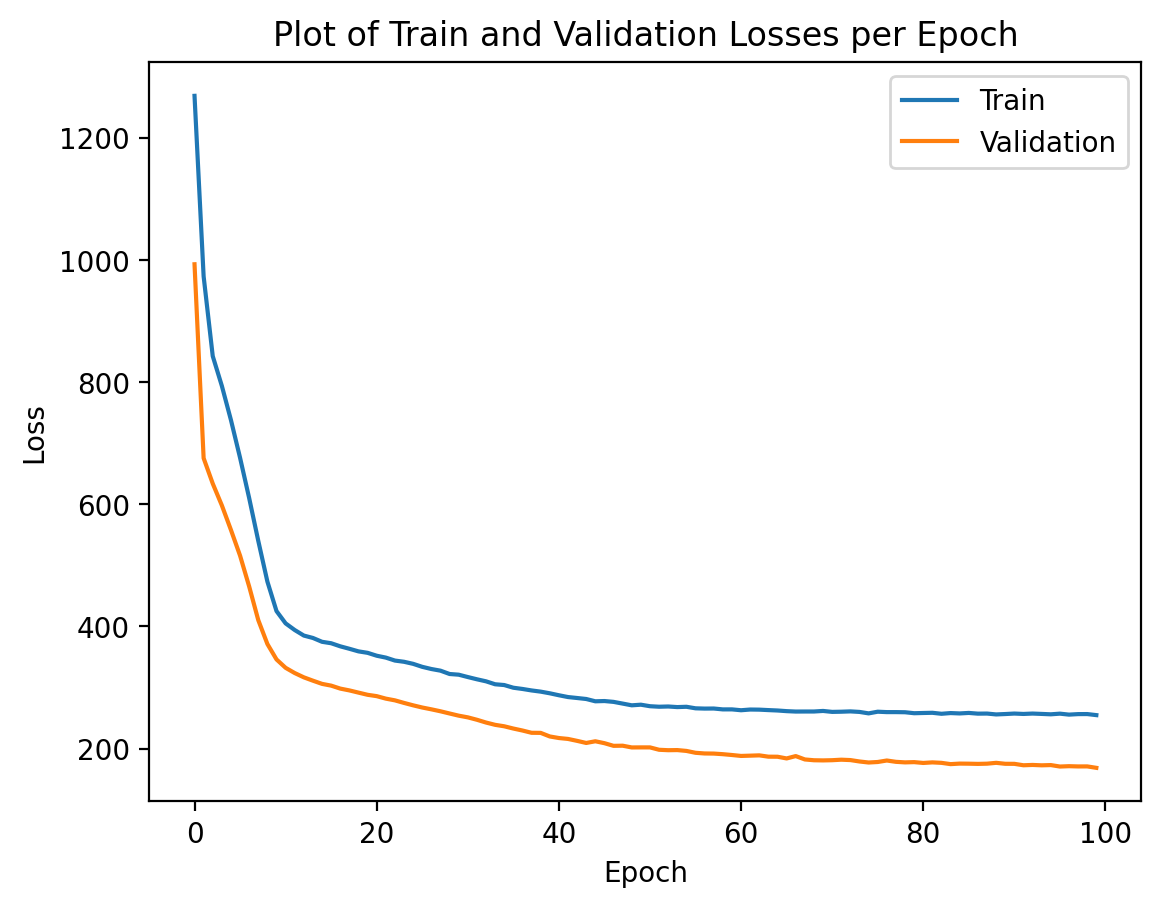

In [47]:
## 1. plot train and val losses
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();
plt.title("Plot of Train and Validation Losses per Epoch")
plt.show();

Summary
* Its clear the model is overfitting on the training data as we can see after 15 epochs the val loss drops and the train loss stays steady state which means that the model has learned the training data well but performs poorly on unseen data.

In [48]:
##min val losses
min(val_losses), val_losses[-1]

(168.494190461045, 168.494190461045)

# Save best model

In [49]:
best_model = copy.deepcopy(model)
best_model.load_state_dict(best_model_state)

<All keys matched successfully>

# Run inference/predictions using model

In [50]:
## inference
best_model.eval()
## store labels and preds
predictions = []
labels = []
with torch.inference_mode():
  ## loop over test data loader
  for features, batch_labels in tqdm(test_loader):
    ## append predictions
    predictions.append(best_model(features.to(device)))
    ## append labels
    labels.append(batch_labels)


100%|██████████| 11/11 [00:00<00:00, 34.95it/s]


In [51]:
## predictions
predictions[0]

tensor([[2292.8059],
        [2220.4065],
        [2247.8459],
        [2301.4832],
        [2285.0496],
        [1810.3158],
        [2219.0510],
        [2254.8977]])

In [52]:
## get labels into single tensor --> flatten to list
labels = torch.cat(labels).flatten().tolist()

## same thing for predictions
predictions = torch.cat(predictions).flatten().tolist()

In [53]:
## check len of both
len(labels), len(predictions)

(88, 88)

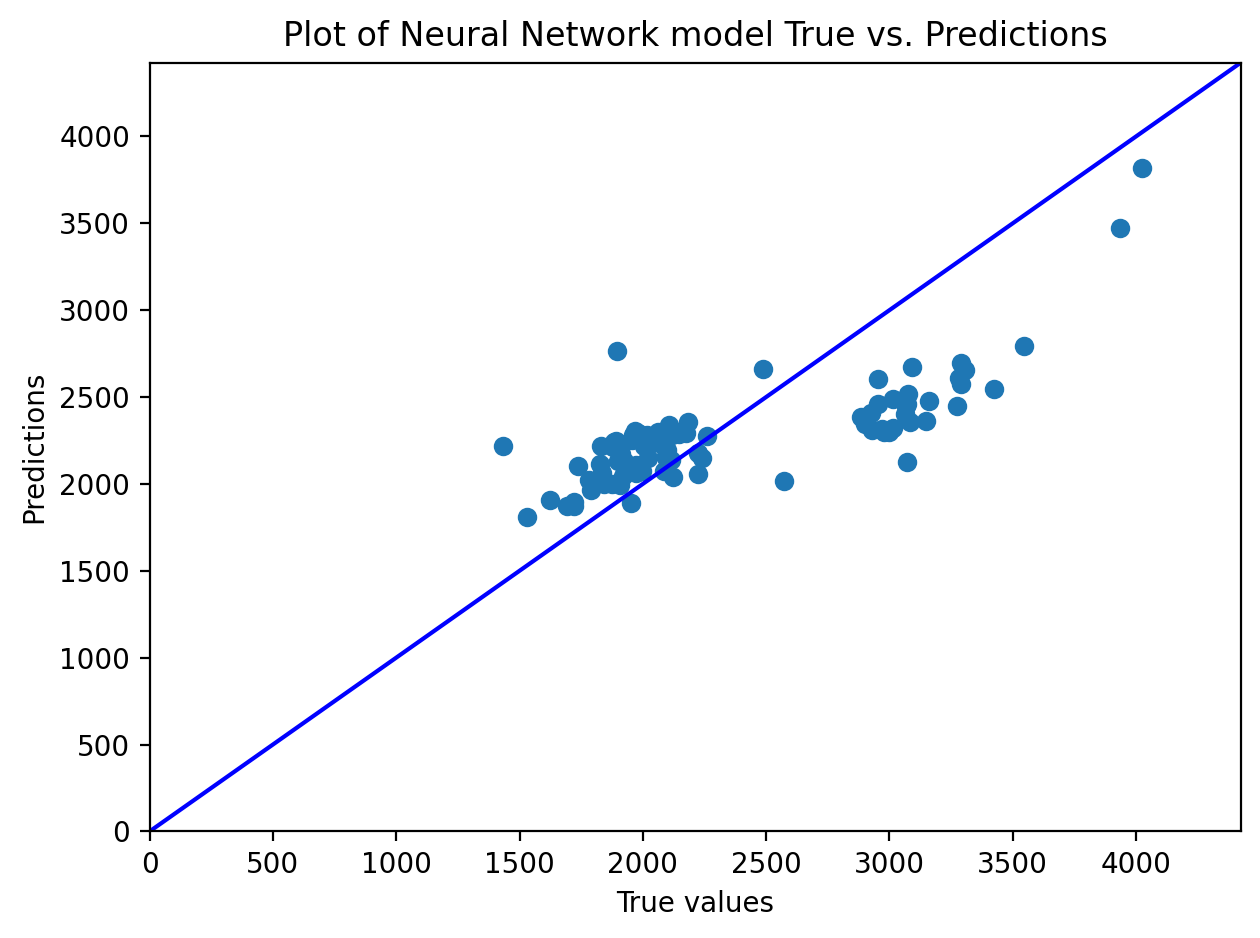

In [55]:
## plot predictions
plt.scatter(labels, predictions)

max_lim = max(max(predictions), max(labels))
max_lim += max_lim * 0.1

plt.xlim(0, max_lim)
plt.ylim(0, max_lim)

plt.plot([0, max_lim], [0, max_lim], "b-")
plt.title("Plot of Neural Network model True vs. Predictions")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.tight_layout()
plt.show();

Summary
* We can see that the predictions were close to the true values but there are some outliers.
* As with any machine learning problem we would work on hyperparameter tuning and optimization techniques for our model and evaluate again.
* We may also closer evaluate which features to use as well.